퍼셉트론은 AND, OR, NAND, XOR 등 논리회로를 표현하여 복잡한 처리도 할 수 있다.<br>
하지만 가중치(가중치, 편향)를 사람이 직접 정해야한다.<br>
신경망은 이를 해결해준다.<br>
가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질이다.

##### 신경망의 예
<image src="./images/neural.png" style="width: 25%; height: 25%">
<br>
<br>
<br>
은닉층의 뉴런은 사람눈에 보이지 않아 은닉층이다.

##### 퍼셉트론 복습
<image src="./images/perceptron.png" style="width: 25%; height: 25%">
<br>
<br>
<br>
위 그림은 x1, x2 라는 두 신호를 입력받아 y를 출력하는 퍼셉트론이다. 이를 수식으로 나타내면 다음과 같다.
<br>
<br>
<image src="./images/퍼셉트론수식_1.png" style="width: 25%; height: 25%">
<br>
<br>
위 수식에서 b는 편향을 나타내는 매개변수로 뉴런이 얼마나 쉽게 활성화 되느냐를 제어<br>
w는 각 신호의 가중치를 나타내는 매개변수로 각 신호의 영향력을 제어<br>
<br>
그런데 위 네트워크 그림에는 편향 b가 보이지 않는다. 여기에 편향을 명시한다면 다음과 같아진다.
<br>
<br>
<image src="./images/퍼셉트론_편향추가.png" style="width: 25%; height: 25%">
<br>
<br>
가중치가 b이고 입력이 1인 뉴런이 추가되었다. 편향의 입력 신호는 항상 1이기 때문에<br>
뉴런을 회색으로 칠해 다른 뉴런과 구분했다.

수식 1을 더 간결한 형태로 다시 작성해본다. 이를 위해서 조건 분기의 동작(0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력)을 하나의 함수로 나타낸다. 이 함수를 h(x)라고 하면 수식 1을 다음과 같이 수식 2로 표현할 수 있다.
<br>
<br>
<image src="./images/퍼셉트론수식_2.png" style="width: 25%; height: 25%">

##### 활성화 함수의 등장
위에서 h(x)라는 함수가 등장했는데, 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화함수(activation function)라 한다. 입력신호의 총 합이 활성화를 일으키는지를 정한다.
<br>
<br>
수식 2를 다시 작성해본다. 수식 2는 다음과 같이 2단계로 나뉜다.
1. 가중치가 곱해진 입력 신호의 총합을 구함
2. 합을 활성화 함수에 입력해 결과를 냄
<div></div>
그래서 이 식은 다음과 같은 2개의 식으로 나눌 수 있다.
<br>
<br>
<image src="./images/퍼셉트론수식_3.png" style="width: 25%; height: 25%">
<br>
<br>
수식 3을 그림으로 나타내면 다음과 같다.
<br>
<br>
<image src="./images/신경망그림4.png" style="width: 25%; height: 25%">
<br>
<br>
이 활성화 함수가 퍼셉트론에서 신경망으로 가기 위한 길잡이이다. 좀 더 자세히 알아본다.

##### 활성화 함수
<image src="./images/퍼셉트론수식_2-2.png" style="width: 25%; height: 25%">
<br>
<br>
수식 2에서 등장한 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단 함수라 한다.<br>
활성화 함수로 쓸 수 있는 여러 후보 중에서 퍼셉트론은 계단 함수를 사용하며, 활성화 함수를<br>
계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠이다.

##### 시그모이드 함수
다음은 신경망에서 자주 이용하는 활성화 함수인 시드모이드 함수(sigmoid function)를 나타낸 식이다.
<br><br>
<image src="./images/퍼셉트론수식_4.png" style="width: 25%; height: 25%">
<br><br>
신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를<br>
다음 뉴런에 전달한다. 퍼셉트론과 신경망의 주된 차이는 이 활성화 함수 뿐이다.<br>
그러면 활성화 함수로 이용되는 시그모이드 함수를 계단 함수와 비교하면서 자세히 살펴본다.

##### 계단 함수 구현하기

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

이 구현은 단순하고 쉽지만, 인수 x는 실수(부동소수점)만 받아들인다.<br>
즉 step_function(3.0)은 되지만 넘파이 배열을 인수로 넣을 수는 없다.<br>
우리는 앞으로를 위해 넘파이 배열도 지원하도록 수정하고 싶다. 그를 위해 다음과 같은 구현을 생각할 수 있다.

In [2]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

다음 예에서는 x라는 넘파이 배열을 준비하고 그 넘파이 배열에 부등호 연산을 수행한다.

In [3]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x > 0
y

array([False,  True,  True])

넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다.<br>
이 y는 bool 배열이다. 그런데 우리가 원하는 계단 함수는 0이나 1의 int형을 출력하는 함수다.<br>
그래서 배열 y의 원소를 bool에서 int형으로 바꿔준다.

In [5]:
y = y.astype(np.int)
y

array([0, 1, 1])

넘파이 배열의 부등호 연산과 자료형 변환을 이용해 계단 함수를 만들어봤다.

##### 계단 함수의 그래프

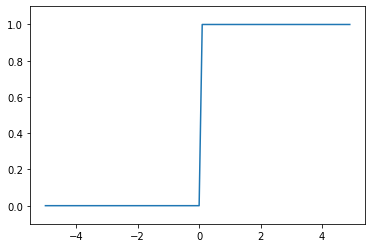

In [6]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

np.arange(-5.0, 5.0, 0.1)은 -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열을 생성한다.<br>
즉, [-5.0, -4.9, .... 4.9]를 생성한다. 이 배열을 step_function에 넣고 출력으로 나온 배열로 그래프를 그렸다.<br>그래프에서 보듯이 계단 함수는 0을 경계로 출력이 바뀐다.

##### 시그모이드 함수 구현

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

위 함수에선 인수가 넘파이배열이어도 올바른 결과가 나온다.<br>
실제로 그런지 테스트를 해본다.

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

시그모이드 함수를 그래프로 그려본다.

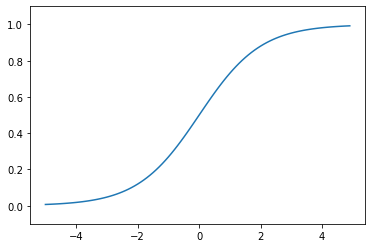

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

##### 시그모이드 함수와 계단 함수 비교

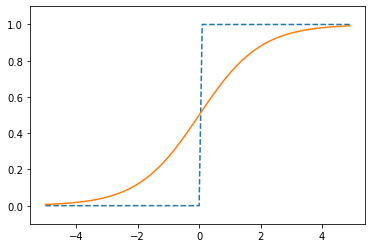

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, '--')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다.<br>
계단 함수는 0을 경계로 출력이 갑자기 바뀌어 버린다. 시그모이드의 연속적임이 신경망 학습에서 아주 중요한 역할을 한다.<br>

In [11]:
print('계단 함수 출력:', y1)
print('시그모이드 함수 출력:', y2)

계단 함수 출력: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
시그모이드 함수 출력: [0.00669285 0.00739154 0.00816257 0.0090133  0.0099518  0.01098694
 0.01212843 0.01338692 0.01477403 0.0163025  0.01798621 0.01984031
 0.02188127 0.02412702 0.02659699 0.02931223 0.03229546 0.03557119
 0.03916572 0.04310725 0.04742587 0.05215356 0.05732418 0.06297336
 0.06913842 0.07585818 0.0831727  0.09112296 0.09975049 0.10909682
 0.11920292 0.13010847 0.14185106 0.15446527 0.16798161 0.18242552
 0.19781611 0.21416502 0.23147522 0.24973989 0.26894142 0.2890505
 0.31002552 0.33181223 0.35434369 0.37754067 0.40131234 0.42555748
 0.450166   0.47502081 0.5        0.52497919 0.549834   0.57444252
 0.59868766 0.62245933 0.64565631 0.66818777 0.68997448 0.7109495
 0.73105858 0.75026011 0.76852478 0.78583498 0.80218389 0.81757448
 0.83201839 0.84553473 0.85814894 0.86

계단 함수가 0과 1 중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려준다는 점도 다르다.<br>
다시 말해 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐른다.

두 함수의 공통점도 살펴본다. 둘은 모양이 비슷하다.<br>
둘 다 입력이 작을 때의 출력은 0에 가깝고(혹은 0이고), 입력이 커지면 출력이 1에 가까워지는(혹은 1이 되는) 구조이다.<br>
즉, 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다.<br>
그리고 입력이 아무리 작거나 커도 출력은 0에서 1사이이다.

##### 비선형 함수
계단 함수와 시그모이드 함수의 공통점은 또 있다. 바로 비선형 함수라는 것이다.<br>
신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 달리 말하면 선형 함수를 사용해서는 안된다.<br>
선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다.<br>
선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는데 있다.<br>
<span style="color: gray">여기 좀 은닉층 이라는 개념이 이해가 안되네</span><br>
층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다.

##### ReLU 함수
지금까지 활성화 함수로서 계단 함수와 시그모이드 함수를 배웠다.<br>
시그모이드 함수는 신경망 분야에서 오랫동안 이용해 왔으나, 최근에는 ReLU(Rectified Linear Unit)함수를 주로 이용한다.<br>
ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.<br>
수식으로는 다음과 같이 나타낼 수 있다.<br><br>
<image src="./images/ReLU함수수식_5.png" style="width: 25%; height: 25%">

렐루 함수는 다음과 같이 파이썬으로 구현할 수 있다.

In [12]:
def relu(x):
    return np.maximum(0, x)

여기서는 넘파이의 maximum 함수를 사용했다. 이는 두 입력 중 큰 값을 선택해 반환하는 함수이다.

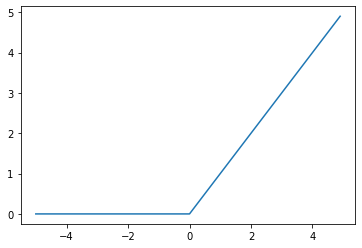

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

##### 다차원 배열의 계산
넘파이의 다차원 배열을 사용한 계산법을 숙달하면 효율적으로 신경망을 구현할 수 있다.<br>

##### 다차원 배열
다차원 배열도 그 기본은 '숫자의 집합'이다. 숫자가 한 줄로 늘어선 것이나 직사각형으로 늘어놓은 것<br>
3차원으로 늘어놓은 것이나 N차원으로 나열하는 것을 통틀어 다차원 배열이라고 한다.

In [14]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [15]:
np.ndim(A)

1

In [16]:
A.shape

(4,)

In [17]:
A.shape[0]

4

배열의 차원수는 np.ndim() 함수로 확인할 수 있다.<br>
배열의 형상은 인스턴스 변수인 shape로 알 수 있다.

In [18]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [19]:
np.ndim(B)

2

In [20]:
B.shape

(3, 2)

여기에서는 '3 * 2 배열'인 B를 작성했다. 처음 차원에는 원소가 3개, 다음 차원에는 원소가 2개 있다는 의미<br>
이때 처음 차원은 0번째 차원, 다음 차원은 1번째 차원에 대응한다.<br>
2차원 배열은 특히 행렬(matrix)이라고 부르고 아래 그림과 같이 배열의 가로 방향을 행(row), 세로 방향을 열(column)이라고 한다.
<br>
<br>
<image src='./images/행렬.png' style='width: 25%; height: 25%'>

##### 행렬의 내적(행렬 곱)
행렬(2차원 배열)의 내적을 구하는 방법을 알아본다. 2 * 2 행렬의 내적은 아래 그림처럼 계산한다.
<br><br>
<image src="./images/행렬곱.png" style="width: 45%; height: 45%">

이 계산을 파이썬으로 구현하면 다음과 같다.

In [21]:
A = np.array([[1, 2], [3, 4]])
A.shape
B = np.array([[5, 6], [7, 8]])
B.shape
np.dot(A, B)

array([[19, 22],
       [43, 50]])

np.dot()은 넘파이 배열 2개를 인수로 받아 그 내적을 반환한다.<br>
주의할 점은 np.dot(A, B) 와 np.dot(B, A)는 같지 않다.<br>
행렬의 곱에는 피연산자의 순서가 다르면 결과도 다르다.

##### 행렬의 내적 주의사항
1. 행렬의 형상에 주의
앞 행렬의 1번째 차원의 원소(열) 수와 뒤 행렬의 0번째 차원의 원소(행) 수 가 같아야함

##### 신경망의 내적
행렬의 곱으로 신경망의 계산을 수행한다.<br>
아래 그림의 간단한 신경망을 가정한다. 이 신경망은 편향과 활성화 함수를 생략하고 가중치만 갖는다.
<br><br>
<image src='./images/간단신경망.png' style="width: 25%; height: 25%">

In [30]:
x = np.array([1, 2])
print(x)
print(x.shape)
print('\n')
w = np.array([[1, 3, 5], [2, 4, 6]])
print(w)
print(w.shape)
print('\n')
y = np.dot(x, w)
print(y)
print(y.shape)

[1 2]
(2,)


[[1 3 5]
 [2 4 6]]
(2, 3)


[ 5 11 17]
(3,)


np.dot() 함수를 이용하면 단번에 결과 y를 얻을 수 있다.<br>
y의 원소가 1,000개든 10,000개든 한 번의 연산으로 계산할 수 있다.<br>
np.dot을 사용하지 않으면 y의 원소를 하나씩 따져보거나 반복문을 사용해야 한다.<br>
그래서 행렬의 내적으로 한꺼번에 계산해주는 기능은 신경망을 구현할 때 매우 중요하다.

##### 중요
출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정의한다. 예를 들어 회귀에는 항등 함수를,<br>
2클래스 분류에는 시그모이드 함수를, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.

##### 신경망 구현 정리

In [35]:
# 항등 함수 구현
def indentity_function(x):
    return x

In [37]:
# 딕셔너리로 신경망 만듦 W -> 가중치, b -> 편향
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] # 가중치
    b1, b2, b3 = network['b1'], network['b2'], network['b3'] # 편향

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = indentity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [0.31682708 0.69627909]

[0.31682708 0.69627909]


- init_network() 함수는 가중치와 편향을 초기화 하고 딕셔너리 변수인 network에 저장<br>
이 딕셔너리 변수 network에는 각 층에 필요한 매개변수(가중치와 편향)을 저장
- forward() 함수는 입력 신호를 출력 신호로 변환하는 처리 과정을 모두 구현<br>
신호가 순방향(입력 -> 출력)으로 전달됨(순전파)

##### 출력층 설계하기
신경망은 분류와 회귀 모두에 이용할 수 있다. 다만 둘 중 어떤 문제냐에 따라 출력층에서<br>
사용하는 활성화 함수가 다르다. 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.

##### 항등 함수와 소프트맥스 함수 구현하기
항등 함수는 입력을 그대로 출력함. 입력과 출력이 항상 같다는 뜻의 항등이다.<br>
분류에서 사용하는 소프트맥스 함수의 식은 다음과 같다.
<br><br>
<image src='./images/소프트맥스수식.png' style='width: 25%; height: 25%'>

In [40]:
# 소프트 맥스 함수의 구현
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


이 논리 흐름을 파이썬 함수로 정의하여 앞으로 필요할 때 사용할 수 있도록 함

In [41]:
# 소프트 맥스
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

소프트맥스 함수 구현시 주의할 점<br>
지수 함수는 아주 쉽게 큰 값을 내뱉기 때문에 오버플로가 발생해 계산이 제대로 안될 수 있다.<br>
따라서 다음과 같이 구현해주어야 한다.

In [42]:
# 소프트 맥스 개선
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

소프트맥스 함수를 사용하면 신경망의 출력은 다음과 같이 계산할 수 있다.

In [44]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


위에서 보듯이 소프트맥스 함수의 출력은 0 ~ 1.0 사이의 실수이다.<br>
또 소프트맥스 함수 출력의 총합은 1이다.<br>
출력 총합이 1이 된다는 점은 소프트맥스 함수의 중요한 성질이다.<br>
이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.

소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 이는 지수 함수 y = exp(x) 가 단조 증가 함수이기 때문이다.

##### 출력층의 뉴런 수 정하기
출력층의 누런 수는 풀려는 문제에 맞게 적절히 정해야 한다. 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.